In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv')

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


According to above information there are no missing values

C:\Users\Siddharth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


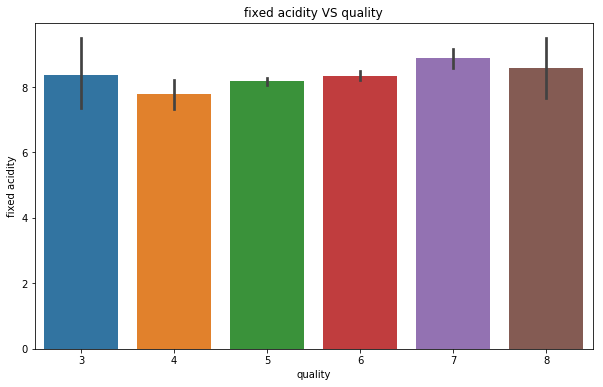

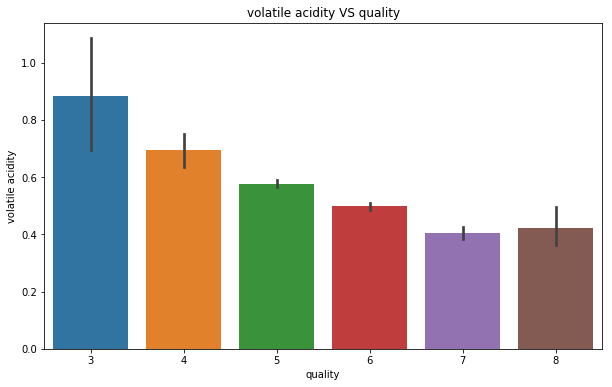

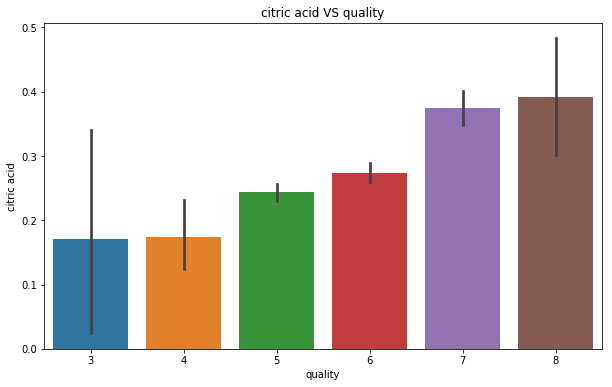

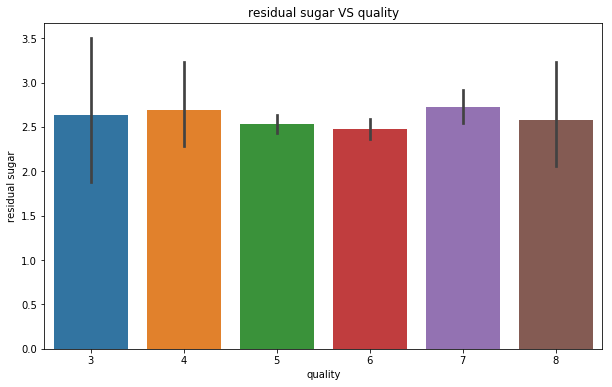

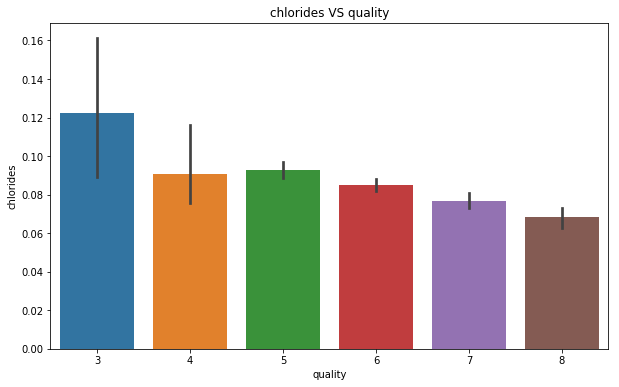

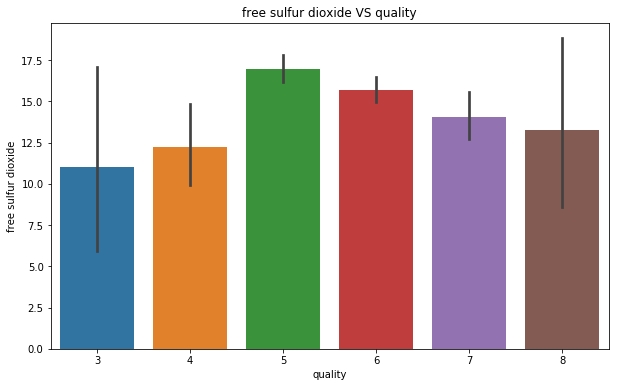

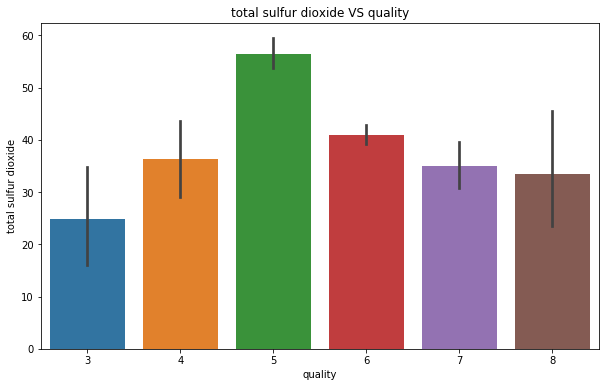

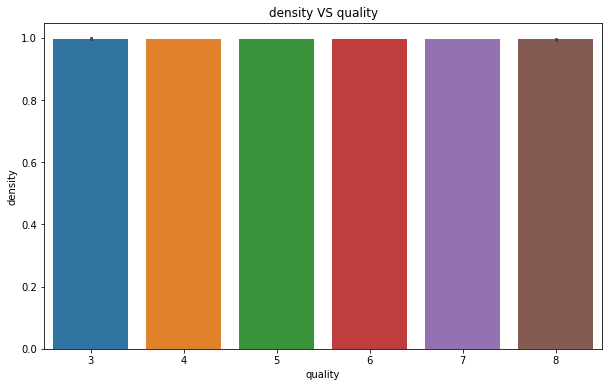

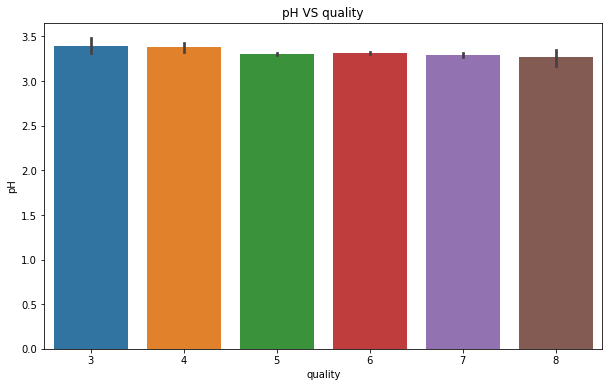

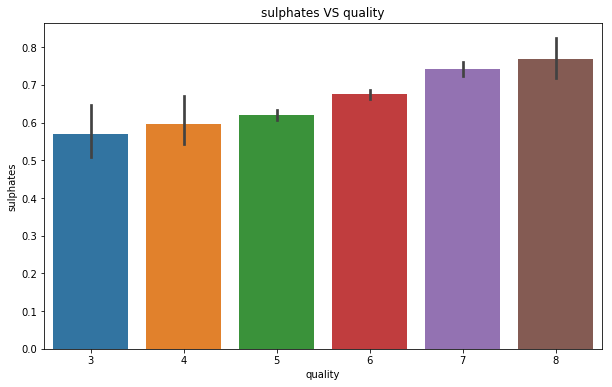

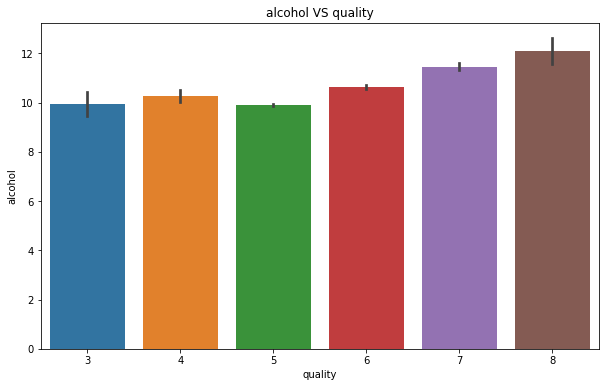

In [14]:
## Distributions of columns in dataset : 

cols = wine.columns.tolist()
cols.remove('quality')
for i in cols:
    fig = plt.figure(figsize=(10,6))
    plt.title("{} VS quality".format(i))
    sns.barplot(x = 'quality', y = i, data = wine)
    

1.) Fixed acidity does not give any specification to classify the quality

2.) Volatile Acidity decreases as quality increases

3.) Citric Acid increases as quality increases

4.) Residual Sugar does not give any specification to classify quality

5.) Chlorides increases as quality increases

6.) Free Sulpher Dioxide does not give any specification to classify quality.

7.) Total Sulpher Dioxide does not give any specification to classify quality. 

8.) Density and Ph remains almost constant.

9.) Sulphates and Alcohol increases as quality increases.


PREPROCESSING

In [16]:
bins = (2,6,8)

group_names = ['bad','good']

wine['quality'] = pd.cut(wine['quality'],bins=bins,labels=group_names)

In [18]:
wine['quality'].head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [19]:
# LABEL-ENCODING

label = LabelEncoder()

In [21]:
wine['quality'] = label.fit_transform(wine['quality'])

# this just converted bad to 0 and good to 1

In [22]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

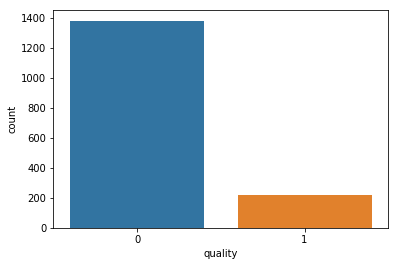

In [23]:
sns.countplot(wine['quality'])

In [24]:
X = wine.drop('quality',axis=1)

y = wine['quality']

In [25]:
# Splitting dataset into train and test 

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3)

In [26]:
# Scaling the data :
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
ran  = RandomForestClassifier(n_estimators=100)
ran.fit(X_train,Y_train)
pred_ran = ran.predict(X_test)

In [30]:
print(classification_report(Y_test,pred_ran))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       414
          1       0.72      0.42      0.53        66

avg / total       0.89      0.90      0.89       480



Random Forest gives accuracy of 89%

In [31]:
# Confusion Matrix of Random forest 

print(confusion_matrix(Y_test,pred_ran))

[[403  11]
 [ 38  28]]


In [33]:
# Using Support Vector Classifier

svc = SVC()
svc.fit(X_train,Y_train)
pred_svc = svc.predict(X_test)

In [34]:
print(classification_report(Y_test,pred_svc))

             precision    recall  f1-score   support

          0       0.89      0.98      0.94       414
          1       0.69      0.27      0.39        66

avg / total       0.87      0.88      0.86       480



SVC gets 87% accuracy